**HOUSE PRICE PREDICTION MODEL**

data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#LOADING THE TRAINING SET
Traindf=pd.read_csv('htrain.csv')
#LOADING THE TEST SET
Testdf=pd.read_csv('htest.csv')

In [3]:
print(Traindf.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
#CHECK THE NUMBER OF NULL VALUES
print(Traindf.isnull().sum())



Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:
print(Traindf.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
col_check=['LotFrontage','Alley','MiscFeature','Fence','PoolQC']
print(Traindf[col_check].isnull().sum())

LotFrontage     259
Alley          1369
MiscFeature    1406
Fence          1179
PoolQC         1453
dtype: int64


In [7]:
print(Traindf[['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','CentralAir','Electrical','KitchenQual','KitchenQual','FireplaceQu','GarageType','GarageFinish','GarageQual','PavedDrive','SaleType','SaleCondition']].isnull().sum())

MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
CentralAir         0
Electrical         1
KitchenQual        0
KitchenQual        0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64


In [8]:
print(Traindf.shape)

(1460, 81)


In [9]:
print(Testdf.shape)

(1459, 80)


In [10]:
#REMOVING UNNECESSARY COLUMNS

traindf=Traindf.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature','Utilities','RoofMatl','Street','Heating','LowQualFinSF'])
testdf=Testdf.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature','Utilities','RoofMatl','Street','Heating','LowQualFinSF'])

In [11]:
print(traindf.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 

In [12]:
categorical_col=['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1',
                 'Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType',
                 'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                 'BsmtFinType2','CentralAir','Electrical','KitchenQual','FireplaceQu','HeatingQC','Functional','GarageCond',
                 'GarageType','GarageFinish','GarageQual','PavedDrive','SaleType','SaleCondition']
numerical_col=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
               'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
               'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
               'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
               'MoSold','YrSold','YearBuilt','YearRemodAdd']

In [13]:
print(traindf[categorical_col].isnull().sum())

MSZoning           0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
CentralAir         0
Electrical         1
KitchenQual        0
FireplaceQu      690
HeatingQC          0
Functional         0
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64


In [14]:
print(traindf[numerical_col].isnull().sum())

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
YearBuilt          0
YearRemodAdd       0
dtype: int64


In [15]:
#HANDLING MISSING VALUES
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
# Fit and transform the 'LotFrontage' column
traindf[numerical_col]=imputer.fit_transform(traindf[numerical_col])
testdf[numerical_col]=imputer.fit_transform(testdf[numerical_col])
#traindf[['LotFrontage','GarageYrBlt','MasVnrArea']] = imputer.fit_transform(traindf[['LotFrontage','GarageYrBlt','MasVnrArea']])
#testdf[['LotFrontage','GarageYrBlt','MasVnrArea']] = imputer.transform(testdf[['LotFrontage','GarageYrBlt','MasVnrArea']])
#FIT AND TRANSFORM THE 'BsmtFinType2' COLUMN
imputer1=SimpleImputer(strategy='most_frequent')
#FIT AND TRANSFORM THE 'GarageQual' COLUMN
traindf[categorical_col]=imputer1.fit_transform(traindf[categorical_col])
testdf[categorical_col]=imputer1.transform(testdf[categorical_col])
#traindf[['GarageQual','GarageCond','BsmtFinType2','GarageType','GarageFinish','FireplaceQu','MasVnrType','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']] = imputer1.fit_transform(traindf[['GarageQual','GarageCond','BsmtFinType2','GarageType','GarageFinish','FireplaceQu','MasVnrType','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']])
#testdf[['GarageQual','GarageCond','BsmtFinType2','GarageType','GarageFinish','FireplaceQu','MasVnrType','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']] = imputer1.transform(testdf[['GarageQual','GarageCond','BsmtFinType2','GarageType','GarageFinish','FireplaceQu','MasVnrType','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']])


In [16]:
traindf.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 71, dtype: int64

In [17]:
testdf.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 70, dtype: int64

In [18]:
print(traindf.shape)

(1460, 71)


In [19]:
print(testdf.shape)

(1459, 70)


In [20]:
#SPLITTING THE FEATURES INTO TARGET VARIABLE AND OTHER FEATURES
X_train=traindf.drop(columns=['SalePrice'])
y_train=traindf['SalePrice']
X_test=testdf


In [21]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [22]:
print(X_train.shape)

(1460, 70)


In [23]:
print(X_train.columns)
print(len(X_train.columns))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 

In [24]:
print(len(numerical_col))

35


In [25]:
print(len(categorical_col))

35


In [26]:
#encoding categorical values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_col)],remainder='passthrough')
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)


In [27]:
print(X_train.shape)

(1460, 255)


In [28]:
# Get feature names after one-hot encoding
feature_names = ct.get_feature_names_out()
print(len(feature_names))

255


In [29]:
print(feature_names)

['encoder__MSZoning_C (all)' 'encoder__MSZoning_FV' 'encoder__MSZoning_RH'
 'encoder__MSZoning_RL' 'encoder__MSZoning_RM' 'encoder__LotShape_IR1'
 'encoder__LotShape_IR2' 'encoder__LotShape_IR3' 'encoder__LotShape_Reg'
 'encoder__LandContour_Bnk' 'encoder__LandContour_HLS'
 'encoder__LandContour_Low' 'encoder__LandContour_Lvl'
 'encoder__LotConfig_Corner' 'encoder__LotConfig_CulDSac'
 'encoder__LotConfig_FR2' 'encoder__LotConfig_FR3'
 'encoder__LotConfig_Inside' 'encoder__LandSlope_Gtl'
 'encoder__LandSlope_Mod' 'encoder__LandSlope_Sev'
 'encoder__Neighborhood_Blmngtn' 'encoder__Neighborhood_Blueste'
 'encoder__Neighborhood_BrDale' 'encoder__Neighborhood_BrkSide'
 'encoder__Neighborhood_ClearCr' 'encoder__Neighborhood_CollgCr'
 'encoder__Neighborhood_Crawfor' 'encoder__Neighborhood_Edwards'
 'encoder__Neighborhood_Gilbert' 'encoder__Neighborhood_IDOTRR'
 'encoder__Neighborhood_MeadowV' 'encoder__Neighborhood_Mitchel'
 'encoder__Neighborhood_NAmes' 'encoder__Neighborhood_NPkVill'
 'enco

In [30]:
# Get numerical feature names
numerical_feature_names = [name for name in feature_names if 'remainder__' in name]
numerical_feature_names

['remainder__MSSubClass',
 'remainder__LotFrontage',
 'remainder__LotArea',
 'remainder__OverallQual',
 'remainder__OverallCond',
 'remainder__YearBuilt',
 'remainder__YearRemodAdd',
 'remainder__MasVnrArea',
 'remainder__BsmtFinSF1',
 'remainder__BsmtFinSF2',
 'remainder__BsmtUnfSF',
 'remainder__TotalBsmtSF',
 'remainder__1stFlrSF',
 'remainder__2ndFlrSF',
 'remainder__GrLivArea',
 'remainder__BsmtFullBath',
 'remainder__BsmtHalfBath',
 'remainder__FullBath',
 'remainder__HalfBath',
 'remainder__BedroomAbvGr',
 'remainder__KitchenAbvGr',
 'remainder__TotRmsAbvGrd',
 'remainder__Fireplaces',
 'remainder__GarageYrBlt',
 'remainder__GarageCars',
 'remainder__GarageArea',
 'remainder__WoodDeckSF',
 'remainder__OpenPorchSF',
 'remainder__EnclosedPorch',
 'remainder__3SsnPorch',
 'remainder__ScreenPorch',
 'remainder__PoolArea',
 'remainder__MiscVal',
 'remainder__MoSold',
 'remainder__YrSold']

In [31]:
#cat_feature_names = ct.transformers_[0][1].get_feature_names_out(categorical_col)
#All_feature_names = np.concatenate([cat_feature_names, numerical_col])
#print(len(all_feature_names))

In [32]:
print(X_train.shape)

(1460, 255)


In [33]:
print(X_test.shape)

(1459, 255)


REMOVING IRRELEVANT FEATURES

In [34]:
X_train = X_train.toarray()
X_test=X_test.toarray()

In [35]:
X_train_df=pd.DataFrame(X_train,columns=feature_names)
X_test_df=pd.DataFrame(X_test,columns=feature_names)
y_train_df = pd.DataFrame(y_train, columns=['SalePrice'])


========

In [36]:
print(X_train_df)

      encoder__MSZoning_C (all)  encoder__MSZoning_FV  encoder__MSZoning_RH  \
0                           0.0                   0.0                   0.0   
1                           0.0                   0.0                   0.0   
2                           0.0                   0.0                   0.0   
3                           0.0                   0.0                   0.0   
4                           0.0                   0.0                   0.0   
...                         ...                   ...                   ...   
1455                        0.0                   0.0                   0.0   
1456                        0.0                   0.0                   0.0   
1457                        0.0                   0.0                   0.0   
1458                        0.0                   0.0                   0.0   
1459                        0.0                   0.0                   0.0   

      encoder__MSZoning_RL  encoder__MSZoning_RM  e

In [37]:
# Concatenate X_train_df and y_train_df
data = pd.concat([X_train_df, y_train_df], axis=1)
data

,encoder__MSZoning_C (all),encoder__MSZoning_FV,encoder__MSZoning_RH,encoder__MSZoning_RL,encoder__MSZoning_RM,encoder__LotShape_IR1,encoder__LotShape_IR2,encoder__LotShape_IR3,encoder__LotShape_Reg,encoder__LandContour_Bnk,...,remainder__WoodDeckSF,remainder__OpenPorchSF,remainder__EnclosedPorch,remainder__3SsnPorch,remainder__ScreenPorch,remainder__PoolArea,remainder__MiscVal,remainder__MoSold,remainder__YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500
1458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125


In [38]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [39]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
# Extract correlations with the target variable 'SalePrice'
target_correlation = correlation_matrix['SalePrice']
target_correlation


encoder__MSZoning_C (all)   -0.111257
encoder__MSZoning_FV         0.089950
encoder__MSZoning_RH        -0.065429
encoder__MSZoning_RL         0.245063
encoder__MSZoning_RM        -0.288065
                               ...   
remainder__PoolArea          0.092404
remainder__MiscVal          -0.021190
remainder__MoSold            0.046432
remainder__YrSold           -0.028923
SalePrice                    1.000000
Name: SalePrice, Length: 256, dtype: float64

In [40]:
lower_bound=-0.6
upper_bound=0.5
# Identify features to remove (those within the range [-0.1, 0.1])
irrelevantf = target_correlation[(target_correlation >= lower_bound) & (target_correlation <= upper_bound)].index
print(len(irrelevantf))

243


In [41]:
irrelevantf

Index(['encoder__MSZoning_C (all)', 'encoder__MSZoning_FV',
       'encoder__MSZoning_RH', 'encoder__MSZoning_RL', 'encoder__MSZoning_RM',
       'encoder__LotShape_IR1', 'encoder__LotShape_IR2',
       'encoder__LotShape_IR3', 'encoder__LotShape_Reg',
       'encoder__LandContour_Bnk',
       ...
       'remainder__GarageYrBlt', 'remainder__WoodDeckSF',
       'remainder__OpenPorchSF', 'remainder__EnclosedPorch',
       'remainder__3SsnPorch', 'remainder__ScreenPorch', 'remainder__PoolArea',
       'remainder__MiscVal', 'remainder__MoSold', 'remainder__YrSold'],
      dtype='object', length=243)

In [42]:
data=data.drop(columns=irrelevantf)

In [43]:
# Drop these features from the DataFrame
X_train_df= X_train_df.drop(columns=irrelevantf)


In [44]:
X_test_df= X_test_df.drop(columns=irrelevantf)

In [45]:
print(X_train_df.columns)

Index(['encoder__BsmtQual_Ex', 'encoder__KitchenQual_Ex',
       'remainder__OverallQual', 'remainder__YearBuilt',
       'remainder__YearRemodAdd', 'remainder__TotalBsmtSF',
       'remainder__1stFlrSF', 'remainder__GrLivArea', 'remainder__FullBath',
       'remainder__TotRmsAbvGrd', 'remainder__GarageCars',
       'remainder__GarageArea'],
      dtype='object')


In [46]:
#TotalBsmtSF,OverallQual ,FullBath,TotRmsAbvGrd ,GarageCars=[7,2,6,8,10,9][0,1,3,4,5]

In [47]:
# Calculate the correlation matrix[2,6,7,10,11]
correlation_matrix = data.corr()
# Extract correlations with the target variable 'SalePrice'
target_correlation = correlation_matrix['SalePrice']
target_correlation

encoder__BsmtQual_Ex       0.553105
encoder__KitchenQual_Ex    0.504094
remainder__OverallQual     0.790982
remainder__YearBuilt       0.522897
remainder__YearRemodAdd    0.507101
remainder__TotalBsmtSF     0.613581
remainder__1stFlrSF        0.605852
remainder__GrLivArea       0.708624
remainder__FullBath        0.560664
remainder__TotRmsAbvGrd    0.533723
remainder__GarageCars      0.640409
remainder__GarageArea      0.623431
SalePrice                  1.000000
Name: SalePrice, dtype: float64

In [48]:
X_train_df.columns

Index(['encoder__BsmtQual_Ex', 'encoder__KitchenQual_Ex',
       'remainder__OverallQual', 'remainder__YearBuilt',
       'remainder__YearRemodAdd', 'remainder__TotalBsmtSF',
       'remainder__1stFlrSF', 'remainder__GrLivArea', 'remainder__FullBath',
       'remainder__TotRmsAbvGrd', 'remainder__GarageCars',
       'remainder__GarageArea'],
      dtype='object')

FEATURE SCALING

In [49]:
print(type(X_test_df))

<class 'pandas.core.frame.DataFrame'>


In [50]:
print(numerical_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']


In [51]:
print(X_test_df.columns)

Index(['encoder__BsmtQual_Ex', 'encoder__KitchenQual_Ex',
       'remainder__OverallQual', 'remainder__YearBuilt',
       'remainder__YearRemodAdd', 'remainder__TotalBsmtSF',
       'remainder__1stFlrSF', 'remainder__GrLivArea', 'remainder__FullBath',
       'remainder__TotRmsAbvGrd', 'remainder__GarageCars',
       'remainder__GarageArea'],
      dtype='object')


In [52]:
numerical_features = [col for col in X_train_df.columns if col in numerical_feature_names]
len(numerical_features)

10

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_df[numerical_features]=sc.fit_transform(X_train_df[numerical_features])
X_test_df[numerical_features]=sc.transform(X_test_df[numerical_features])


In [54]:
from sklearn.feature_selection import SelectKBest,f_regression
# Apply SelectKBest after initial feature selection
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_train_df= selector.fit_transform(X_train_df, y_train_df)
X_test_df= selector.transform(X_test_df)
# Get selected feature indices
selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

Selected feature indices: [ 2  5  7 10 11]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


APPLYING THE MODEL ON TRAINING SET


In [55]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
from sklearn.model_selection import cross_val_score


In [56]:
# Apply cross-validation on the training data
cv_scores = cross_val_score(regressor, X_train_df, y_train_df, cv=5, scoring='neg_mean_squared_error')
# Print cross-validation scores
print("Cross-validation scores (Negative MSE):", cv_scores)
print("Mean Cross-validation score (Negative MSE):", np.mean(cv_scores))

Cross-validation scores (Negative MSE): [-1.06964796e+09 -1.46521086e+09 -1.76954006e+09 -1.20024770e+09
 -2.45205040e+09]
Mean Cross-validation score (Negative MSE): -1591339395.652722


In [57]:
regressor.fit(X_train_df,y_train_df)

LinearRegression()

In [58]:
# Make predictions and evaluate the model
y_pred = regressor.predict(X_test_df)


In [59]:
y_pred = regressor.predict(X_test_df)
y_pred

array([[114568.83751431],
       [164757.98756729],
       [159551.62764989],
       ...,
       [152121.54494302],
       [ 91817.78050758],
       [243209.76854419]])

In [60]:
test_ids=Testdf['Id']

In [61]:
test_ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [62]:
y_pred = y_pred.flatten()
y_pred

array([114568.83751431, 164757.98756729, 159551.62764989, ...,
       152121.54494302,  91817.78050758, 243209.76854419])

In [63]:
results_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_pred
})

In [64]:
results_df

,Id,SalePrice
0,1461,114568.837514
1,1462,164757.987567
2,1463,159551.627650
3,1464,181784.385822
4,1465,226130.678389
...,...,...
1454,2915,62185.423538
1455,2916,81629.889294
1456,2917,152121.544943
1457,2918,91817.780508


In [65]:
# Ensure results_df is your DataFrame with the predictions
results_df.to_csv('results_df.csv', index=False)


In [66]:


'''# Load the submission file
submission_df = pd.read_csv('sample_submission.csv')

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(submission_df['SalePrice'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of SalePrice in Submission')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()'''


"# Load the submission file\nsubmission_df = pd.read_csv('sample_submission.csv')\n\n# Plot histogram\nplt.figure(figsize=(10, 6))\nplt.hist(submission_df['SalePrice'], bins=50, edgecolor='k', alpha=0.7)\nplt.title('Distribution of SalePrice in Submission')\nplt.xlabel('SalePrice')\nplt.ylabel('Frequency')\nplt.grid(True)\nplt.show()"

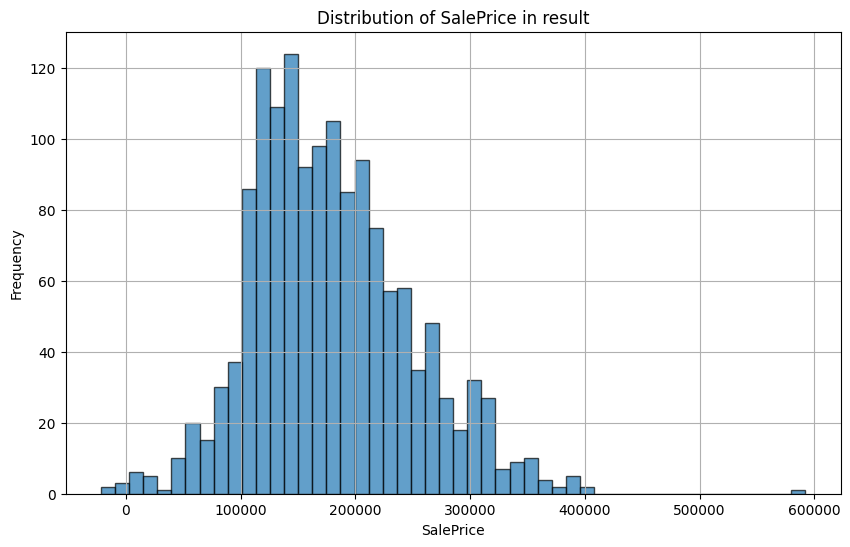

In [67]:
# Sort by Id for a smooth line plot
# Load the submission file
result_df = pd.read_csv('results_df.csv')
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(result_df['SalePrice'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of SalePrice in result')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
